# 정규분포

- 확률밀도함수(Probability denstiy function)
    - 밀도 단위를 써서 확룰과 관련된 개념을 나타내주는 함수
    - 가로축을 x로 세로축을 $f(X)$로 두고 (x, f(x))의 관계를 도식화한 것이다.
    - 밀도함수는 평균이 mu이고, 표준편차가 시그마인 정규분포곡선의 그래프로 표현할 수 있다.


- 정규분포곡선은 실제 자료의 분포가 아니라 실제 자료의 분포를 근사시켜 줄 하나의 수학적 모형이다.


- 평균이 0이고, 표준편차가 1인 정규분포를 특별히 `표준정규분포`라고 한다.

- 확률변수 Z가 표준 정규분포를 따를 때,
$$ Z ~ N(0, 1) $$

- 표준정규분포의 확률밀도함수
$$ f(z) = (1 / \sqrt{2\pi}*\sigma)*{\exp^{-1/2z^2}}$$

- 정규분포곡선을 이용하면 어떠 구간 내에 속한 숫자의 비율을 근사적으로 쉽게 알아낼 수 있다.

- 표준정규분포곡선 아래의 영역은 Z-값으로 찾을 수 있다.


#### Gaussian Distribution

- 가우시안 분포는 보통 정규분포로 알려져있다.
    - 그 이유는, 연속 확률 분포 중 가장 널리 알려진 분포이기 때문.

In [2]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def sum_(data):
    res = 0
    for i in data:
        res += i
        
    return res

def mean_(data):
    return sum_(data)/len(data)

def var_(data):
    mean_val = mean_(data)
    return sum_((data-mean_val)**2) / (len(data)-1)

def std_(data):
    return np.sqrt(var_(data))

def draw_norm(data, ax):
    mean_val = mean_(data)
    std_val = std_(data)
    
    x = np.arange(np.min(data) - std_val*3, np.max(data) +std_val*3, 0.1)
    
    fz = ( 1 / ( np.sqrt(2*np.pi) * std_val ) ) \
    * ( np.exp(  (-1 /2)  *  ((x - mean_val)/std_val)**2 ) )
    
    return ax.plot(x, fz)

In [45]:
path = 'c://users/anjae/Documents/[0] Dataset/pima_diabetes/diabetes.csv'

DF = pd.read_csv(path)

In [46]:
DF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


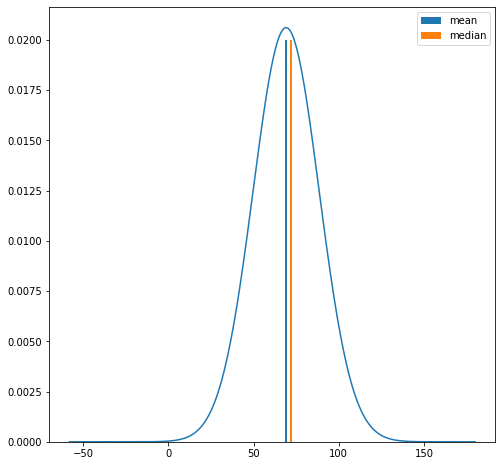

In [47]:
data = DF.BloodPressure

fig, ax = plt.subplots(figsize=(8,8))

draw_norm(data, ax)

ax.bar(mean_(data), height= 0.02, label='mean')
ax.bar(np.median(data), height= 0.02, label='median')
ax.legend()

# 표준정규분포

- 평균을 0, 표준편차를 1로 만들어 정규화시킨 것.

- 특별한 형태이며, 정규화 시킬 경우 두 개의 표본 분포를 비교할 수 있다.

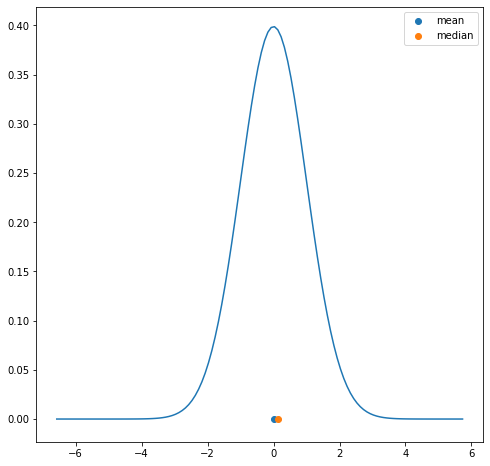

In [48]:
x_ = (data - mean_(data)) / std_(data)

fig, ax = plt.subplots(figsize=(8,8))

draw_norm(x_, ax)

ax.scatter(mean_(x_), 0, label='mean', lw = 1)
ax.scatter(np.median(x_), 0, label='median', lw=1)
ax.legend()